# Lecture #6

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

%matplotlib inline

For this lecture, we are going to be using [these](http://www.stat.cmu.edu/~cshalizi/350-2006/lecture-10.pdf) lecture notes from a Data Mining course by Cosma Shalizi (a CMU Stats professor). Be sure to read through them first...

Let's start by creating at a very basic dataset with two features and two possible values (-1 and 1).

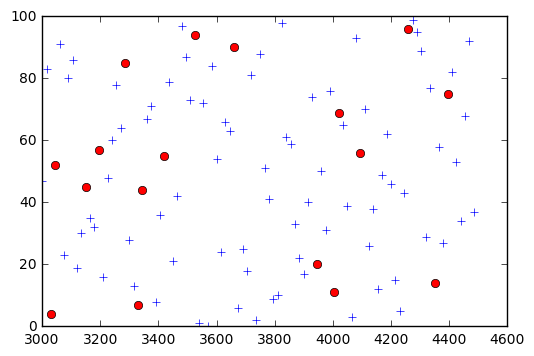

In [176]:
d = {'Value': np.random.binomial(1, 0.8,size=(100,))*2-1,
                  'x1' : np.random.permutation(100)*15+3000,
                  'x2' : np.random.permutation(100)}
df = pd.DataFrame(d)

plt.plot(df[df.Value>0].x1,df[df.Value>0].x2, 'b+')
plt.plot(df[df.Value<=0].x1,df[df.Value<=0].x2, 'ro')
plt.show()

Now, let's define the funciton $S$ (shown on page 5 of the PDF), and let's have it calculate the sum of squared errors for all leaves at a node. As input, it will take the dataset that will go trhough that node of the tree (```d```), the feature we would like to use for splitting (```f```) and the threshold (```t```):

In [220]:
def S(d,f,t):
    left = d[d[f]>t]['Value']
    right = d[d[f]<=t]['Value']

    S_left = np.sum((left-np.mean(left))**2)
    S_right = np.sum((right-np.mean(right))**2)

    return S_left + S_right

Now let's put it to use to check which variable we should split first:

Looks like we should split x1 at 3345


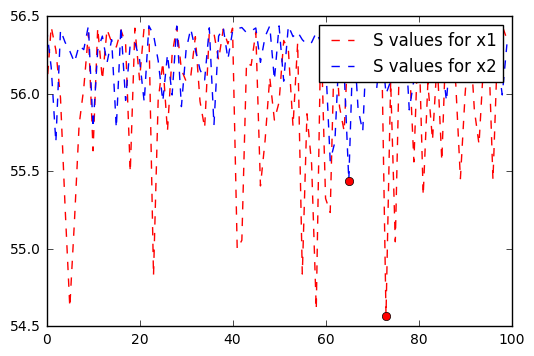

In [234]:
x1thresholds = df.x1.unique() # These are the x1 thresholds
x2thresholds = df.x2.unique() # These are the x2 thresholds

# Let's list all possible thresholds and calculate their S value:
Sx1 = [S(df,'x1',t) for t in x1thresholds]
Sx2 = [S(df,'x2',t) for t in x2thresholds]

plt.plot(Sx1,'r--')
plt.plot(Sx2,'b--')

x1t = x1thresholds[np.argmin(Sx1)]
x2t = x2thresholds[np.argmin(Sx2)]

Sx1min = np.min(Sx1)
Sx2min = np.min(Sx2)

plt.plot(np.argmin(Sx1), Sx1min,'or')
plt.plot(np.argmin(Sx2), Sx2min,'or')
plt.legend(['S values for x1', 'S values for x2'])

if Sx2min > Sx1min:
    print("Looks like we should split x1 at {}".format(x1t))
else:
    print("Looks like we should split x2 at {}".format(x2t))
        
plt.show()


So we go ahead and make the split... Two new filtered datasets:

In [235]:
branch1 = df[df.x1>x1t]
branch2 = df[df.x1<=x1t]

... and you can go from there to repeat the process. But I'm tired.

So we are going to try it out with ```sklearn```:

In [246]:
from sklearn import tree

In [251]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df[['x1','x2']], df['Value'])

# We are done!

In [252]:
print(clf.feature_importances_)

[ 0.52720699  0.47279301]
